#  Time Series Analysis- ECommerse Sales

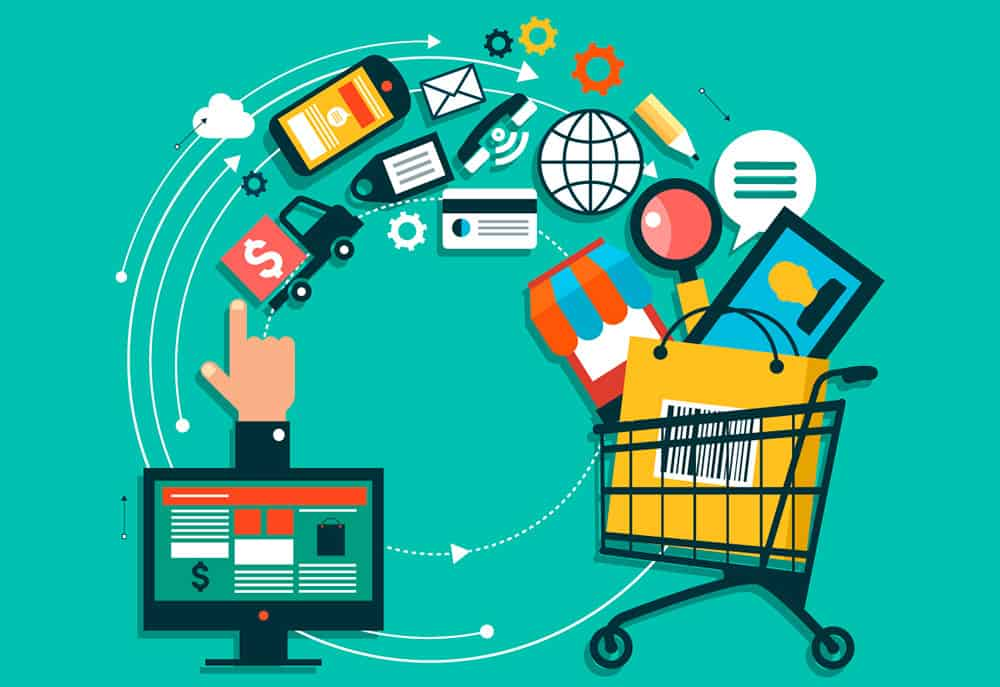

## Integrantes:
* Sergio Suarez
* Danny Sanchez
* Tomas Werth
* Javiera Cerda

# problema
trabajamos con datos de ventas de productos de una empresa multinacional, se busca analizar los datos, reconocer fechas importantes y encontrar un modelo que se ajuste correctamente a sus ganancias por dia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

# conozcamos nuestros datos

In [2]:
df = pd.read_csv('data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
print(len(df.InvoiceNo.unique()))
grupo = df.groupby(['InvoiceNo','Country']).count() 
print(grupo.shape)
grupo.head()

25900
(25900, 6)


,,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
InvoiceNo,Country,,,,,,
536365,United Kingdom,7,7,7,7,7,7
536366,United Kingdom,2,2,2,2,2,2
536367,United Kingdom,12,12,12,12,12,12
536368,United Kingdom,4,4,4,4,4,4
536369,United Kingdom,1,1,1,1,1,1


de esto se intuye que "InvoiceNo" es el codigo de un local que vende el producto, este se encuentra en una pais determinado y se repite en diferentes productos

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

debemos cambiar el formato de "InvoiceDate" para poder trabajarlo como tiempo y lo indexaremos por fecha para tener una noción ordenada de los datos.

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')

In [8]:
df=df.set_index(df.index.date)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


guardamos solo la fecha para analizar ventas por dia no por hora que es muy especifico

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

podemos notar que solo 2 variables tienen nan, estas son description y cutomerID, como nos interesa analizar las ventas no trabajaremos con el customerID ya que lo importante es que el producto se este vendiendo, no a quien se le vendio.

In [11]:
df = df.drop(columns=['CustomerID'])

In [12]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
UnitPrice         0
Country           0
dtype: int64

In [13]:
df['Description'] = df['Description'].fillna('UNKNOWN ITEM')
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

llenamos los nan de descripcion para evitarnos problemas al trabajar con la tabla

# veamos los productos

In [14]:
len(df['Description'].unique())

4224

In [15]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
BREAD BIN, DINER STYLE, MINT             1
GOLD COSMETICS BAG WITH BUTTERFLY        1
?sold as sets?                           1
FOUND                                    1
BLUE DROP EARRINGS W BEAD CLUSTER        1
Name: Description, Length: 4224, dtype: int64

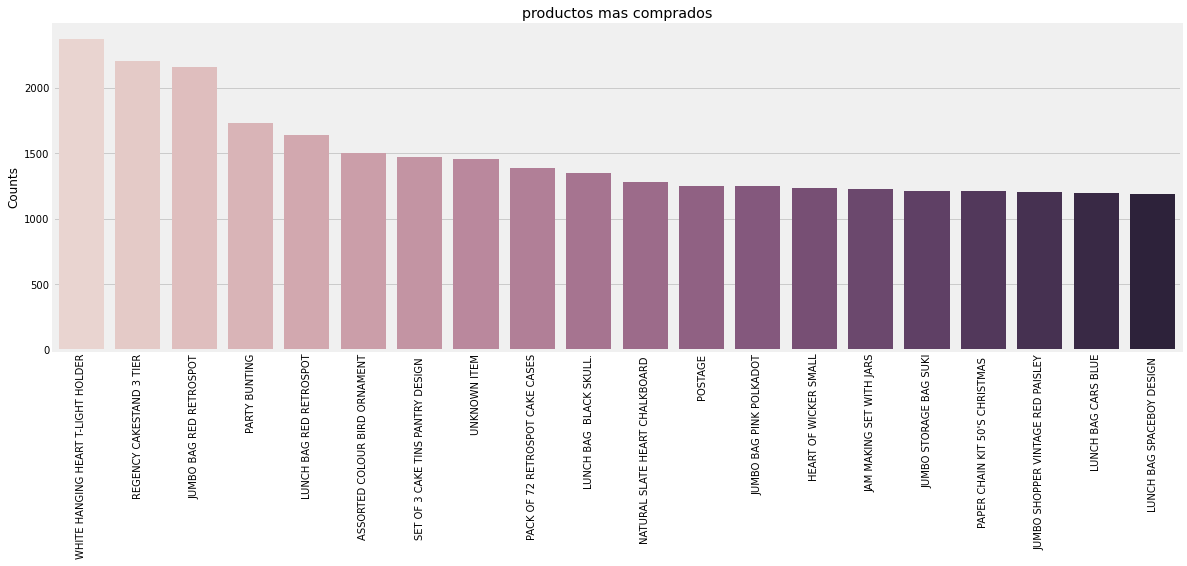

In [16]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(20))
plt.ylabel("Counts")
plt.title("productos mas comprados");
plt.xticks(rotation=90);

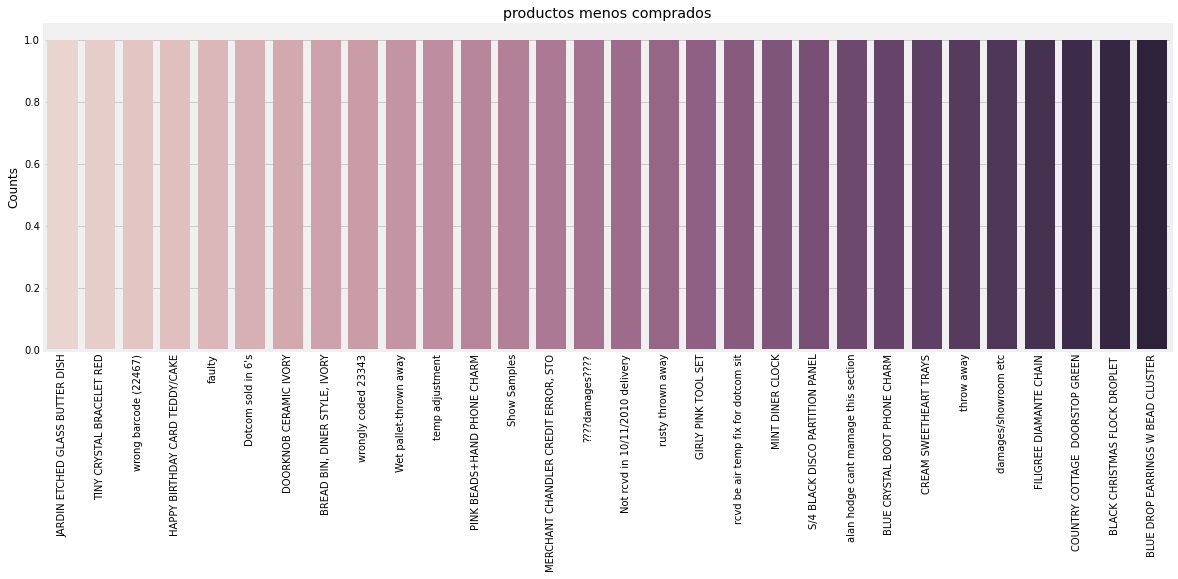

In [17]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[-30:]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(30))
plt.ylabel("Counts")
plt.title("productos menos comprados");
plt.xticks(rotation=90);

# crearemos nuestra variable a analizar

In [18]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34


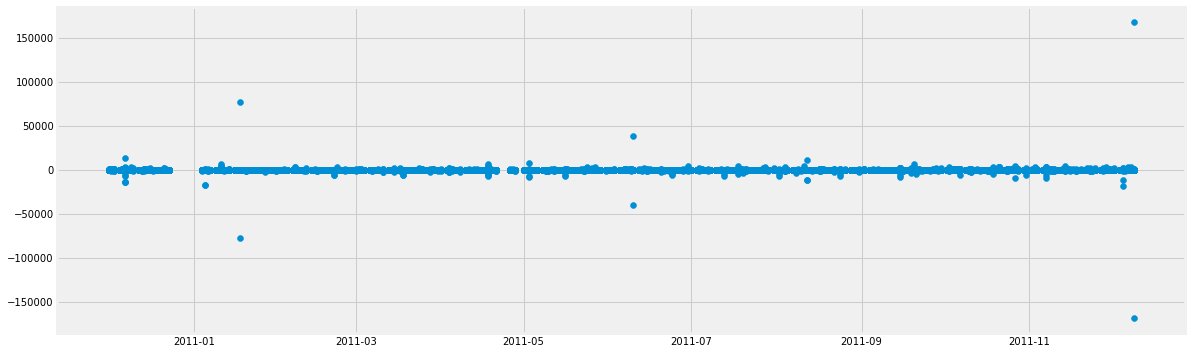

In [19]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Sales'])

vemos que posee unos outliers que complican mucho el problema

# pais unspecified

In [20]:
L=df.loc[df["Country"]=="Unspecified"].InvoiceNo.unique()
L

array(['549687', '552695', '553857', '557499', '559521', '559929',
       '561658', '561661', '563947', '564051', '565303', '576646',
       '578539'], dtype=object)

In [21]:
a=[]
for i in L:
    a.append(len(df.loc[df["InvoiceNo"] == i].Country.unique()))
print (a)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


por lo que consideraremos Unspecified como un pais al igual que el resto

In [22]:
df.Quantity.loc[df["Quantity"]<0].count()

10624

algunos datos tienen una cantidad negativa, esto se considero devoluciones de productos

In [23]:
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
2010-12-01,C536379,D,Discount,-1,27.50,United Kingdom,-27.50
2010-12-01,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,United Kingdom,-4.65
2010-12-01,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,United Kingdom,-19.80
2010-12-01,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,United Kingdom,-6.96
2010-12-01,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,United Kingdom,-6.96


# ventas por pais

In [24]:
df3=pd.DataFrame(df.groupby([df.index,"Country"]).sum())
df3.reset_index(inplace=True)
df3=df3.set_index("level_0")
df3.index.names=["InvoiceDate"]
df3.head()

,Country,Quantity,UnitPrice,Sales
InvoiceDate,,,,
2010-12-01,Australia,107,73.90,358.25
2010-12-01,EIRE,243,133.64,555.38
2010-12-01,France,449,55.29,855.86
2010-12-01,Germany,117,93.82,139.18
2010-12-01,Netherlands,97,16.85,192.60


se agrupo sumando las ventas diarias y la cantidad de productos, por lo que sales son ganancias totales del dia, Quantity es la cantidad de productos vendidos netos y unit price pierde su valor en esta tabla.

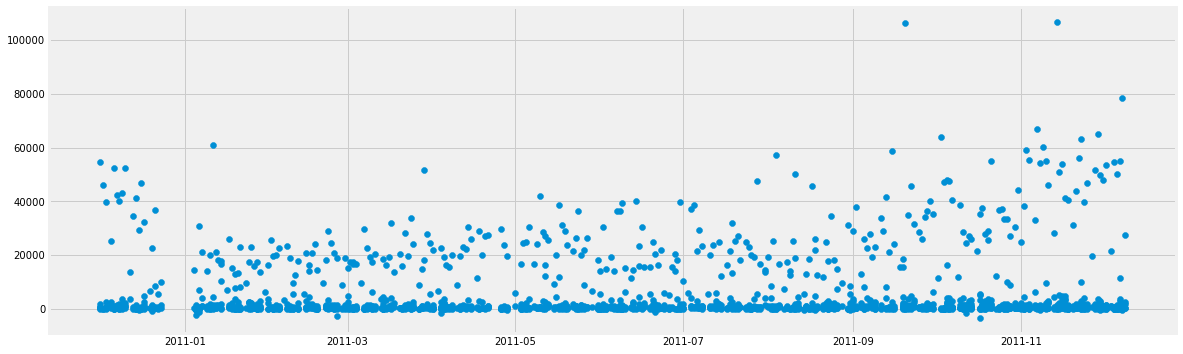

In [25]:
plt.figure(figsize=(18,6))
plt.scatter(x=df3.index, y=df3['Sales'])

desaparecieron muchos valores negativos ya que hay mas valores positivos en un dia y al sumar se agrandan los outliers positivos y regucen los negativos

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

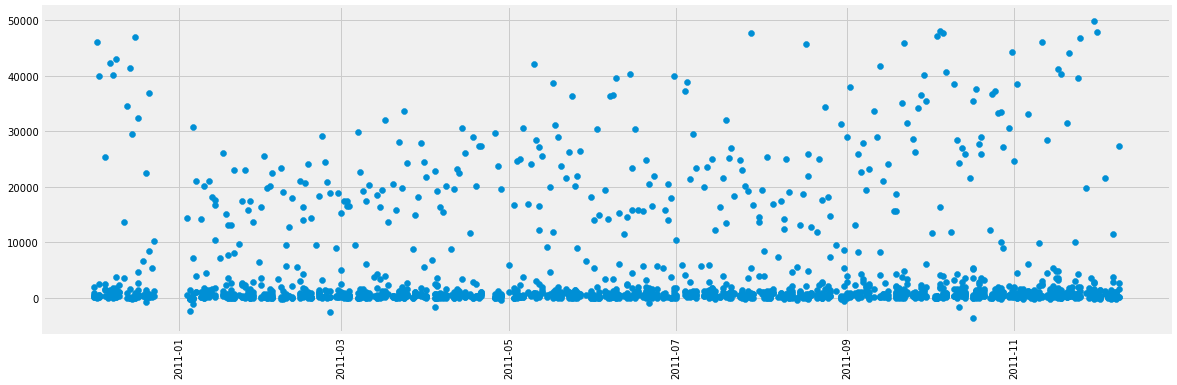

In [26]:
df3 = df3[df3['Sales'] < 50000]
plt.figure(figsize=(18,6))
plt.scatter(x=df3.index, y=df3['Sales'])
plt.xticks(rotation=90)

eliminamos algunos outliers muy alejados de nuestros datos en general

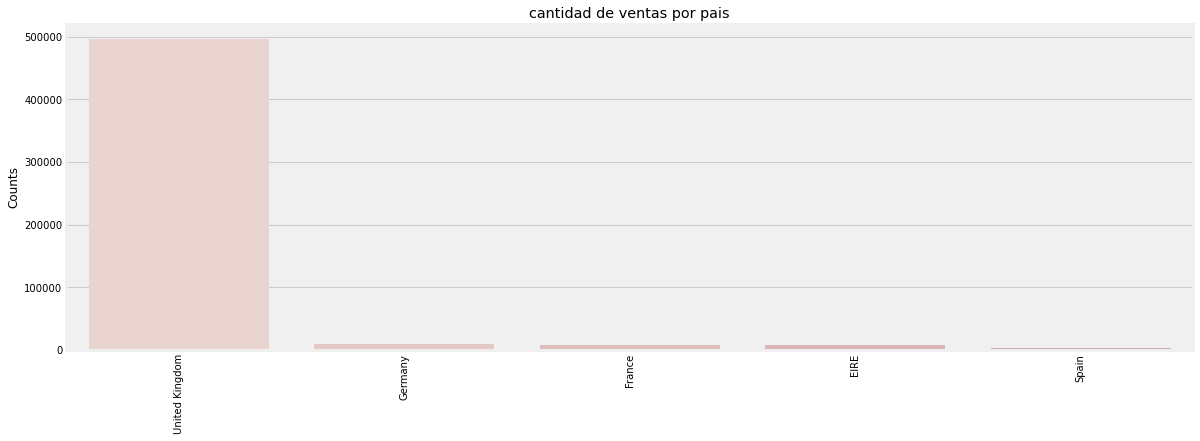

In [27]:
item_counts = df['Country'].value_counts().sort_values(ascending=False).iloc[0:5]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(20))
plt.ylabel("Counts")
plt.title("cantidad de ventas por pais");
plt.xticks(rotation=90);

notamos una clara superioridad de ventas por parte de united kingdom por lo que centraremos nuesto analisis en este pais

In [28]:
df3.index = pd.to_datetime(df3.index)

In [29]:
df_UK=df3.loc[df3.Country == "United Kingdom"]
df_UK.head()

,Country,Quantity,UnitPrice,Sales
InvoiceDate,,,,
2010-12-02,United Kingdom,20873,6752.48,46053.93
2010-12-03,United Kingdom,10439,10313.01,39985.44
2010-12-05,United Kingdom,13604,7106.07,25462.20
2010-12-07,United Kingdom,23769,84769.81,42301.48
2010-12-08,United Kingdom,20086,9540.41,40167.17


In [30]:
df_UK=df_UK.drop("Country", axis=1)

In [31]:
df_UK.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,276.0,12487.086957,6071.340990,-13746.00,8372.0000,11782.500,16407.250,32884.00
UnitPrice,276.0,6686.062623,6951.442895,-7602.19,3569.8275,5112.005,7626.945,84769.81
Sales,276.0,23307.771138,10793.595845,-2280.36,15873.4375,21902.450,29580.110,49849.38


notamos que el count es de solo 276, esto es porque al agrupar por pais y fecha este datatframe nos entrega las ganancias por dia, es decir tenemos informacion de 276 dias de ventas

In [32]:
import statsmodels.graphics.tsaplots as sgt 

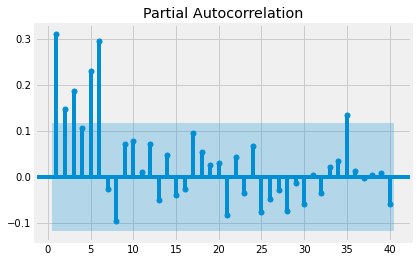

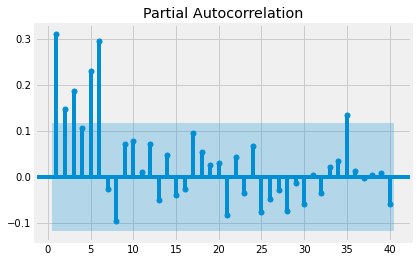

In [33]:
sgt.plot_pacf(df_UK.Sales, lags=40, zero=False, method='ols')

vemos la autocorrelacion parcial y notamos que hay un rango de error enorme dados los lags significativos, por lo que no es confiable usar un modelo que dependa de valores anteriores, mucho menos si son antes de 3 experiencias pasadas

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

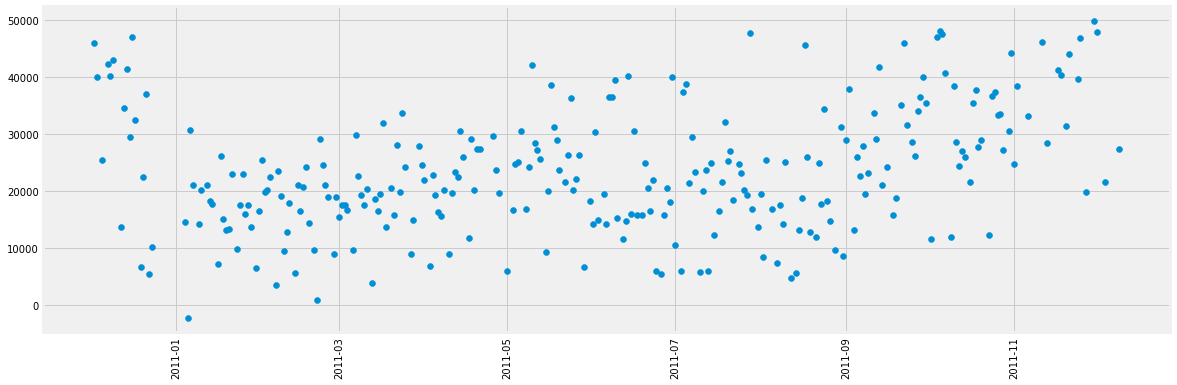

In [34]:
plt.figure(figsize=(18,6))
plt.scatter(x=df_UK.index, y=df_UK['Sales'])
plt.xticks(rotation=90)

In [35]:
print('Fecha Inicio: {}\nFecha Fin:    {}'.format(df_UK.index.min(),df_UK.index.max()))

Fecha Inicio: 2010-12-02 00:00:00
Fecha Fin:    2011-12-09 00:00:00


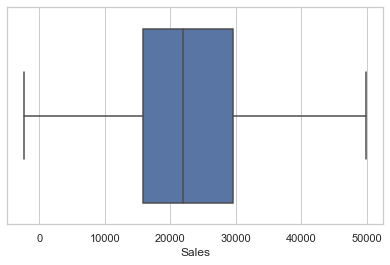

In [36]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_UK.Sales)

In [37]:
df_UK['year'] = pd.DatetimeIndex(df_UK.index).year

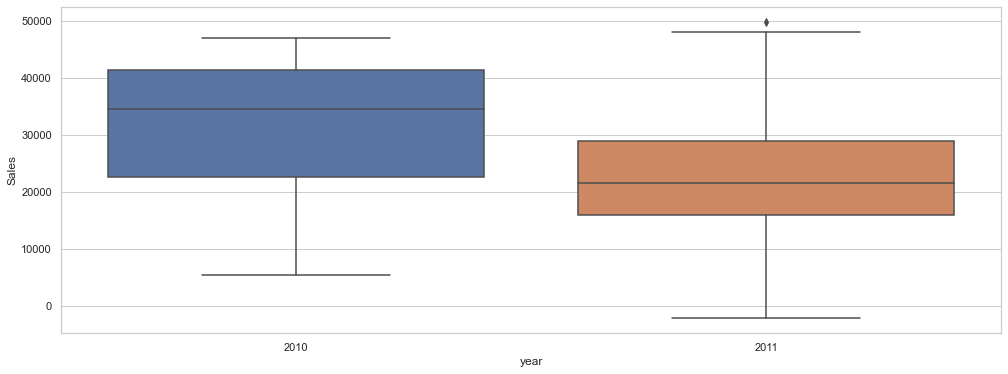

In [38]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df_UK.year, df_UK.Sales, ax=ax)
plt.show()

In [39]:
df_ts_UK = df_UK[['Sales']]
df_ts_UK.head()

,Sales
InvoiceDate,
2010-12-02,46053.93
2010-12-03,39985.44
2010-12-05,25462.20
2010-12-07,42301.48
2010-12-08,40167.17


<AxesSubplot:xlabel='InvoiceDate'>

<Figure size 1296x432 with 0 Axes>

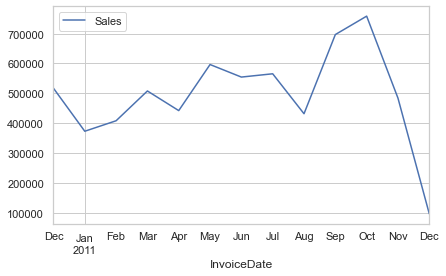

In [40]:
plt.figure(figsize=(18,6))
df_resample = df_ts_UK.resample('M').sum()
df_resample.plot()

grafico de las ventas por mes

<AxesSubplot:xlabel='InvoiceDate'>

<Figure size 1296x432 with 0 Axes>

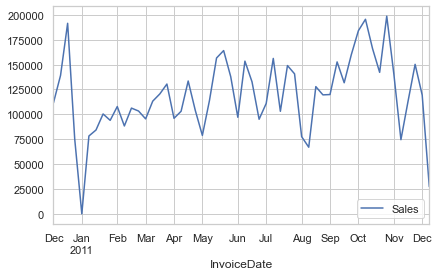

In [41]:
plt.figure(figsize=(18,6))
df_resample = df_ts_UK.resample('W').sum()
df_resample.plot()

grafico de las ventas por semana

In [42]:
df_resample['12-2010':'01-2011']

,Sales
InvoiceDate,
2010-12-05,111501.57
2010-12-12,139113.01
2010-12-19,191501.99
2010-12-26,75103.46
2011-01-02,0.00
2011-01-09,78222.14
2011-01-16,84235.97
2011-01-23,100363.66
2011-01-30,93961.86


vemos una pausa en las ganancias el 02-01-2011, se teoriza que es por fiesta de año nuevo

<AxesSubplot:xlabel='InvoiceDate'>

<Figure size 1296x432 with 0 Axes>

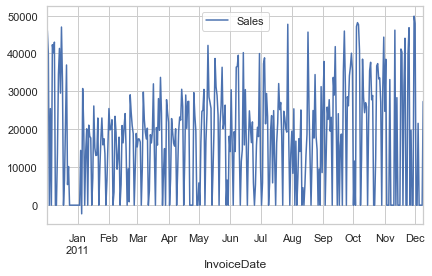

In [43]:
plt.figure(figsize=(18,6))
df_resample = df_ts_UK.resample('D').sum()
df_resample.plot()

grafico de las ventas por dia

### Germany:

In [44]:
df_G=df3.loc[df3.Country == "Germany"]
df_G.head()

,Country,Quantity,UnitPrice,Sales
InvoiceDate,,,,
2010-12-01,Germany,117,93.82,139.18
2010-12-02,Germany,146,51.95,138.35
2010-12-03,Germany,170,115.84,555.53
2010-12-05,Germany,1362,373.58,2476.69
2010-12-06,Germany,85,56.83,162.44


In [45]:
df_G_y=df_G.drop("Country", axis=1)
df_G_y.head()

,Quantity,UnitPrice,Sales
InvoiceDate,,,
2010-12-01,117,93.82,139.18
2010-12-02,146,51.95,138.35
2010-12-03,170,115.84,555.53
2010-12-05,1362,373.58,2476.69
2010-12-06,85,56.83,162.44


In [46]:
df_G_y.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,232.0,506.241379,642.181686,-97.00,93.750,335.000,667.750,5825.00
UnitPrice,232.0,162.353448,216.049418,0.39,50.930,102.085,191.385,2134.80
Sales,232.0,955.595733,1238.370893,-237.26,235.995,625.940,1215.215,12165.25


(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

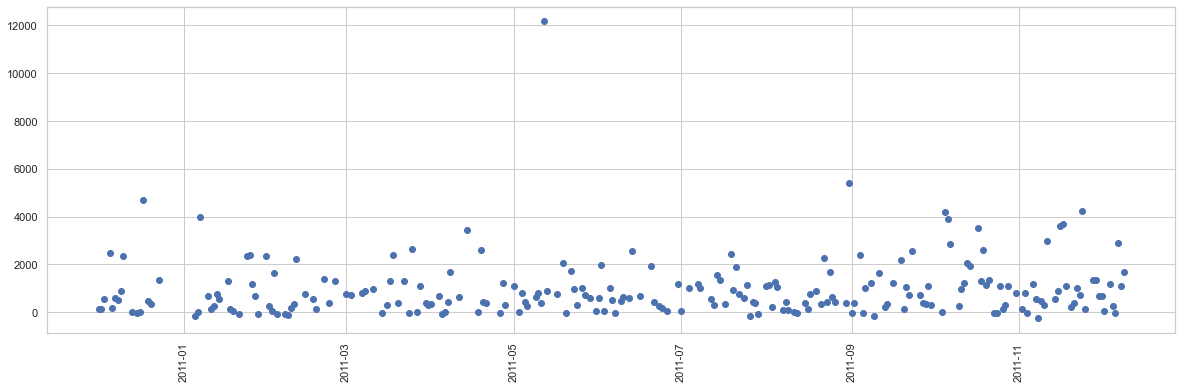

In [47]:
plt.figure(figsize=(18,6))
plt.scatter(x=df_G.index, y=df_G_y['Sales'])
plt.xticks(rotation=90)

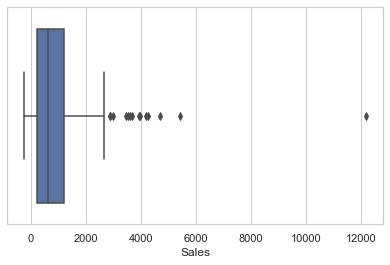

In [48]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_G_y.Sales)

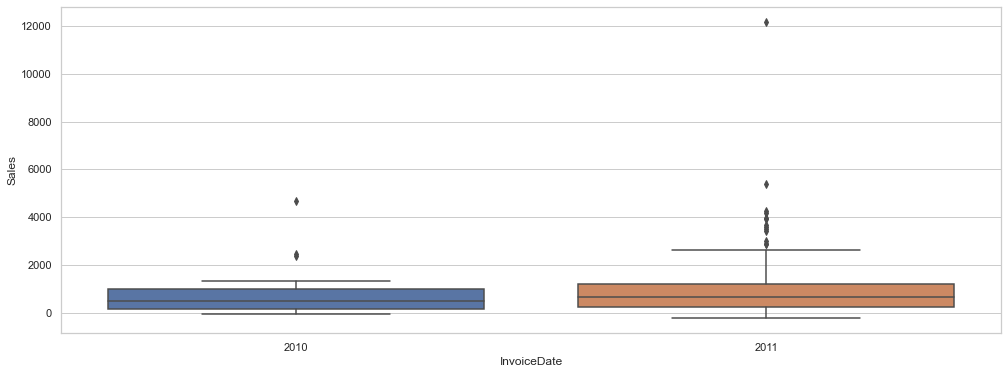

In [49]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df_G_y.Sales.index.year, df_G_y.Sales, ax=ax)
plt.show()

In [50]:
df_ts_G = df_G[['Sales']]
df_ts_G.head()

,Sales
InvoiceDate,
2010-12-01,139.18
2010-12-02,138.35
2010-12-03,555.53
2010-12-05,2476.69
2010-12-06,162.44


<AxesSubplot:xlabel='InvoiceDate'>

<Figure size 1296x432 with 0 Axes>

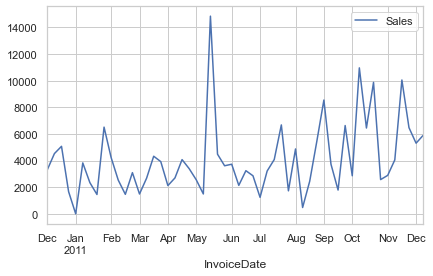

In [51]:
plt.figure(figsize=(18,6))
df_resample = df_ts_G.resample('W').sum()
df_resample.plot()

In [52]:
df_resample['12-2010':'01-2011']

,Sales
InvoiceDate,
2010-12-05,3309.75
2010-12-12,4521.39
2010-12-19,5065.79
2010-12-26,1665.91
2011-01-02,0.00
2011-01-09,3820.99
2011-01-16,2341.56
2011-01-23,1450.17
2011-01-30,6506.50


nuevamente el mismo periodo sin ganancias

### France:

In [53]:
df_F=df3.loc[df3.Country == "France"]
df_F

,Country,Quantity,UnitPrice,Sales
InvoiceDate,,,,
2010-12-01,France,449,55.29,855.86
2010-12-03,France,239,89.88,425.38
2010-12-05,France,611,287.19,1526.92
2010-12-07,France,752,182.44,1448.98
2010-12-08,France,121,40.71,173.55
...,...,...,...,...
2011-12-05,France,477,106.73,797.48
2011-12-06,France,787,268.48,1403.94
2011-12-07,France,561,136.98,1117.62


In [54]:
df_F_y=df_F.drop("Country", axis=1)
df_F_y.head()

,Quantity,UnitPrice,Sales
InvoiceDate,,,
2010-12-01,449,55.29,855.86
2010-12-03,239,89.88,425.38
2010-12-05,611,287.19,1526.92
2010-12-07,752,182.44,1448.98
2010-12-08,121,40.71,173.55


In [55]:
df_F_y.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,222.0,497.657658,564.756384,-61.00,157.2500,363.00,658.0000,5246.00
UnitPrice,222.0,193.837793,862.205681,0.42,51.0150,100.43,182.3775,12701.82
Sales,222.0,889.206757,981.769124,-86.00,301.4025,642.92,1185.2050,8990.46


(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

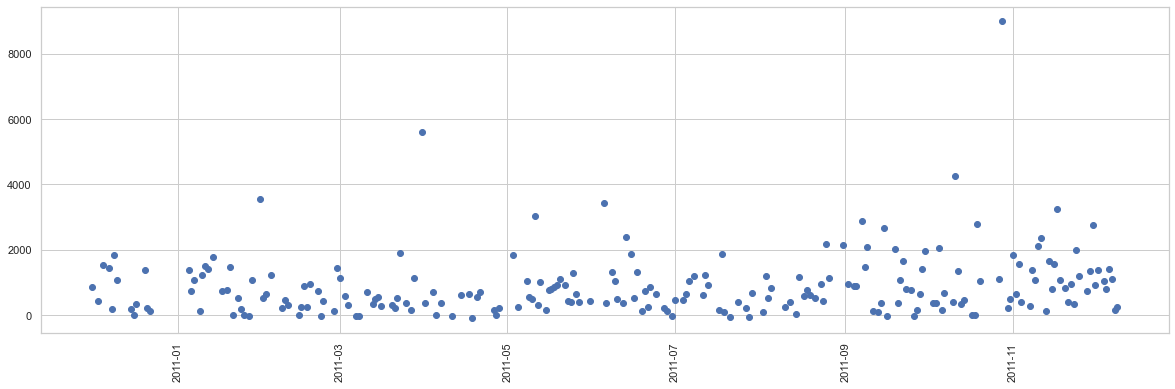

In [56]:
plt.figure(figsize=(18,6))
plt.scatter(x=df_F.index, y=df_F_y['Sales'])
plt.xticks(rotation=90)

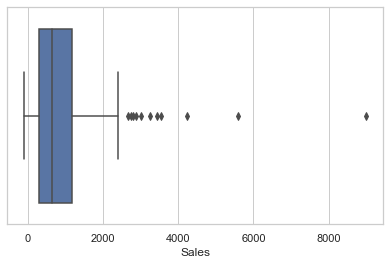

In [57]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_F_y.Sales)

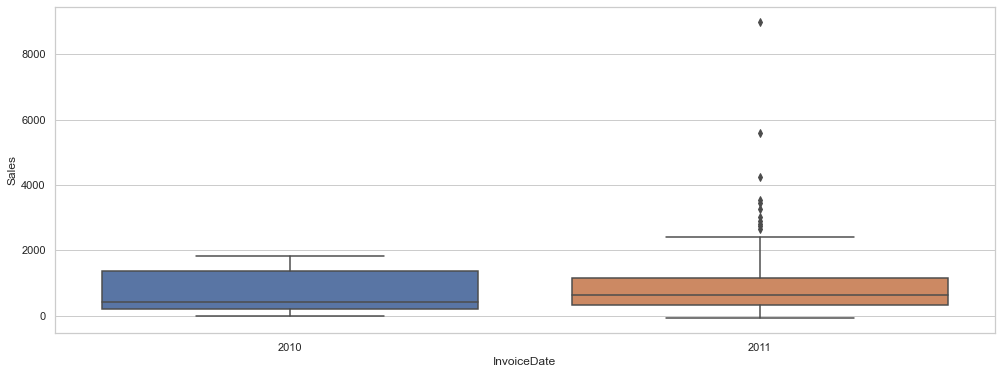

In [58]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df_F_y.Sales.index.year, df_F_y.Sales, ax=ax)
plt.show()

In [59]:
df_ts_F = df_F[['Sales']]
df_ts_F.head()

,Sales
InvoiceDate,
2010-12-01,855.86
2010-12-03,425.38
2010-12-05,1526.92
2010-12-07,1448.98
2010-12-08,173.55


<AxesSubplot:xlabel='InvoiceDate'>

<Figure size 1296x432 with 0 Axes>

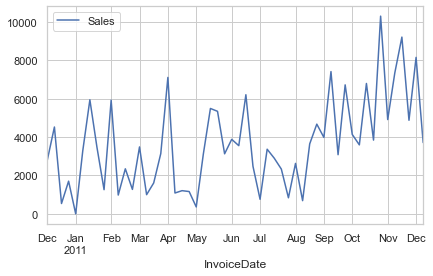

In [60]:
plt.figure(figsize=(18,6))
df_resample = df_ts_F.resample('W').sum()
df_resample.plot()

In [61]:
df_resample['12-2010':'01-2011']

,Sales
InvoiceDate,
2010-12-05,2808.16
2010-12-12,4527.01
2010-12-19,537.32
2010-12-26,1702.87
2011-01-02,0.00
2011-01-09,3293.39
2011-01-16,5946.81
2011-01-23,3466.82
2011-01-30,1258.83


### Irlanda (EIRE)

In [62]:
df_I=df3.loc[df3.Country == "EIRE"]
df_I.head()

,Country,Quantity,UnitPrice,Sales
InvoiceDate,,,,
2010-12-01,EIRE,243,133.64,555.38
2010-12-02,EIRE,4,11.25,15.00
2010-12-03,EIRE,2575,338.76,2576.85
2010-12-06,EIRE,614,215.40,1182.50
2010-12-09,EIRE,287,169.65,945.55


In [63]:
df_I_y=df_I.drop("Country", axis=1)
df_I_y.head()

,Quantity,UnitPrice,Sales
InvoiceDate,,,
2010-12-01,243,133.64,555.38
2010-12-02,4,11.25,15.00
2010-12-03,2575,338.76,2576.85
2010-12-06,614,215.40,1182.50
2010-12-09,287,169.65,945.55


In [64]:
df_I_y.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,180.0,792.427778,1171.003676,-672.00,161.0000,443.000,858.750,7238.00
UnitPrice,180.0,269.151056,687.367240,0.85,89.6575,148.920,254.145,6748.68
Sales,180.0,1462.649000,2287.075848,-2548.80,374.5275,813.385,1596.585,16774.72


(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

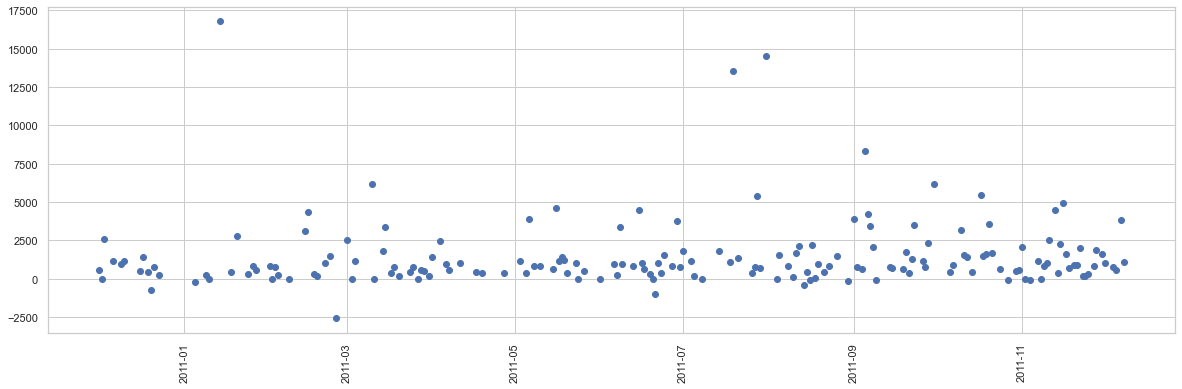

In [65]:
plt.figure(figsize=(18,6))
plt.scatter(x=df_I.index, y=df_I_y['Sales'])
plt.xticks(rotation=90)

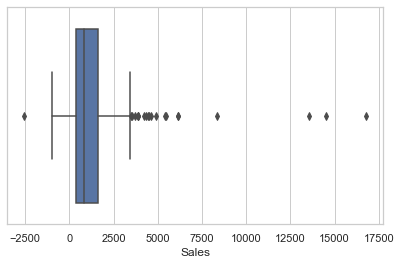

In [66]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_I_y.Sales)

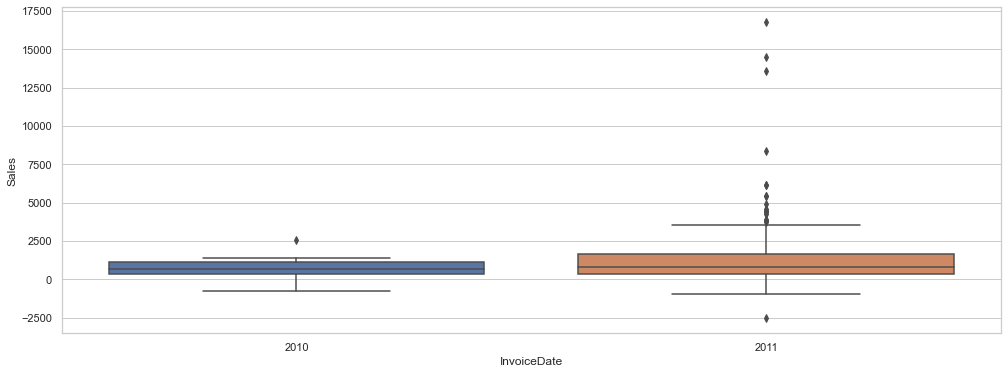

In [67]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df_I_y.Sales.index.year, df_I_y.Sales, ax=ax)
plt.show()

In [68]:
df_ts_I = df_I[['Sales']]
df_ts_I.head()

,Sales
InvoiceDate,
2010-12-01,555.38
2010-12-02,15.00
2010-12-03,2576.85
2010-12-06,1182.50
2010-12-09,945.55


<AxesSubplot:xlabel='InvoiceDate'>

<Figure size 1296x432 with 0 Axes>

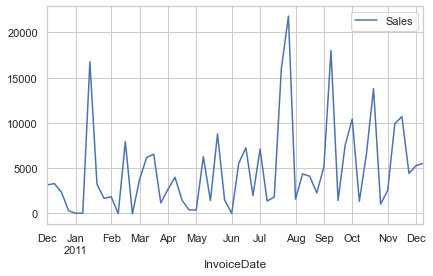

In [69]:
plt.figure(figsize=(18,6))
df_resample = df_ts_I.resample('W').sum()
df_resample.plot()

In [70]:
df_resample['12-2010':'01-2011']

,Sales
InvoiceDate,
2010-12-05,3147.23
2010-12-12,3284.10
2010-12-19,2321.78
2010-12-26,276.84
2011-01-02,0.00
2011-01-09,25.33
2011-01-16,16759.72
2011-01-23,3222.42
2011-01-30,1649.05


## Modelos: 

In [71]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [72]:
y = df_UK['Sales']
X = df_UK.drop(columns=['Sales'])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [74]:

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5

regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}


### Linear regresion:

In [75]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

regressor = GridSearchCV(regression_dict['LinearRegression'], param_grid_dict['LinearRegression'], cv=cv, n_jobs=-1)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


In [76]:
print(" === Linear Regression ===".format("LinearRegression"))
score_dict['LinearRegression'] = regressor.best_score_
print("Mejores parametros: {}".format(regressor.best_params_)) 
params_dict = regressor.best_params_
print("Mejor score {}".format(regressor.best_score_))


 === Linear Regression ===
Mejores parametros: {'fit_intercept': True}
Mejor score 0.5834522503165911


In [77]:
mae_dict['LinearRegression'] = mean_absolute_error(y_test, y_pred)
print("MAE for {}".format("LinearRegression"))
print(mean_absolute_error(y_test, y_pred))
mse_dict['LinearRegression'] = mean_squared_error(y_test, y_pred)
print("MSE para linear regression".format("LinearRegression"))
print(mean_squared_error(y_test, y_pred))
r2_dict["LinearRegression"] = r2_score(y_test, y_pred)
print("R2 score para linear regression".format("LinearRegression"))
print(r2_score(y_test, y_pred))

best_est_dict['LinearRegression'] = regressor.best_estimator_

MAE for LinearRegression
4197.37344200999
MSE para linear regression
32200029.04699142
R2 score para linear regression
0.6966395622560538


Podemos ver que las metricas son bastante elevadas, Tenemos un MAE de 4197 y el MSE es el que mas se dispara.

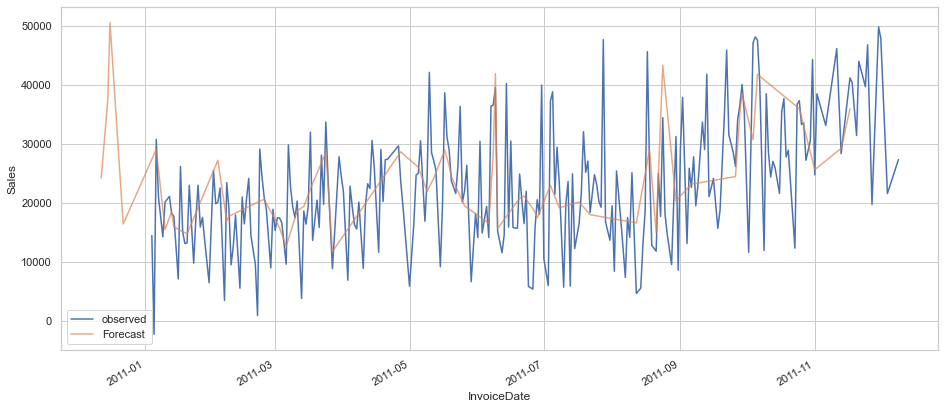

In [78]:
df_temp=pd.DataFrame({
        'y':y_test,
        'y_hat':y_pred
}
)
preds = df_temp['y_hat']
ax = y['2011':].plot(label='observed')
preds.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

del grafico, podemos notar que este modelo no es tan bueno, tal como esperabamos por el analisis realizado de las metricas.

### Decision Tree

In [79]:
regressor = GridSearchCV(regression_dict['DecisionTreeRegressor'], param_grid_dict['DecisionTreeRegressor'], cv=cv, n_jobs=-1)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [80]:
print(" === Start report for regressor {} ===".format('DecisionTreeRegressor'))
score_dict['DecisionTreeRegressor'] = regressor.best_score_
print("Tuned Parameters: {}".format(regressor.best_params_)) 
params_dict = regressor.best_params_
print("Best score is {}".format(regressor.best_score_))

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.5216912175834262


In [81]:
mae_dict['DecisionTreeRegressor'] = mean_absolute_error(y_test, y_pred)
print("MAE for {}".format('DecisionTreeRegressor'))
print(mean_absolute_error(y_test, y_pred))
mse_dict['DecisionTreeRegressor'] = mean_squared_error(y_test, y_pred)
print("MSE for {}".format('DecisionTreeRegressor'))
print(mean_squared_error(y_test, y_pred))
r2_dict['DecisionTreeRegressor'] = r2_score(y_test, y_pred)
print("R2 score for {}".format('DecisionTreeRegressor'))
print(r2_score(y_test, y_pred))
print(" === End of report for regressor {} === \n".format('DecisionTreeRegressor'))
  
best_est_dict['DecisionTreeRegressor'] = regressor.best_estimator_

MAE for DecisionTreeRegressor
4831.399178571427
MSE for DecisionTreeRegressor
46675836.13466467
R2 score for DecisionTreeRegressor
0.5602612015904511
 === End of report for regressor DecisionTreeRegressor === 



Nuevamente La MSE es exageradamente elevada y el MAE es alto.Veamos el grafico para tener una perspectiva visual:

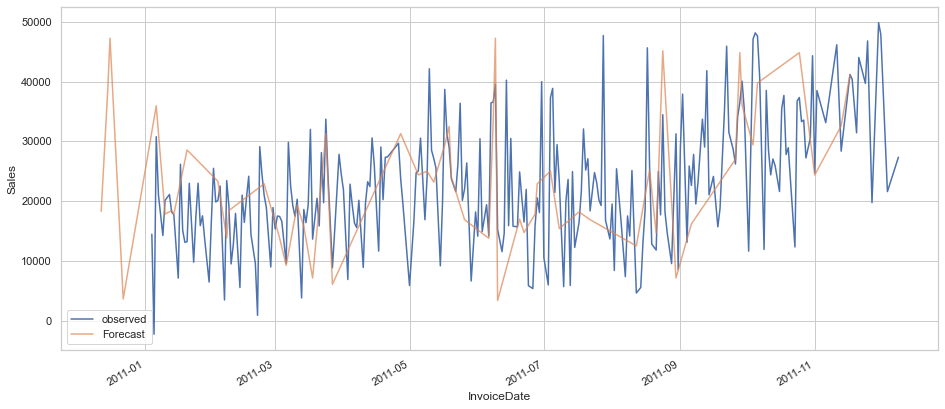

In [82]:
df_temp=pd.DataFrame({
        'y':y_test,
        'y_hat':y_pred
}
)
preds = df_temp['y_hat']
ax = y['2011':].plot(label='observed')
preds.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

Tal como habiamos dicho, se ve que el modelo no ajusta del todo bien.

### Random Forest

In [83]:
regressor = GridSearchCV(regression_dict['RandomForest'], param_grid_dict['RandomForest'], cv=cv, n_jobs=-1)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)



In [84]:
print(" === Start report for regressor {} ===".format('RandomForest'))
score_dict['RandomForest'] = regressor.best_score_
print("Tuned Parameters: {}".format(regressor.best_params_)) 
params_dict = regressor.best_params_
print("Best score is {}".format(regressor.best_score_))

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.717842345239413


In [85]:
mae_dict['RandomForest'] = mean_absolute_error(y_test, y_pred)
print("MAE for {}".format('RandomForest'))
print(mean_absolute_error(y_test, y_pred))
mse_dict['RandomForest'] = mean_squared_error(y_test, y_pred)
print("MSE for {}".format('RandomForest'))
print(mean_squared_error(y_test, y_pred))
r2_dict['RandomForest'] = r2_score(y_test, y_pred)
print("R2 score for {}".format('RandomForest'))
print(r2_score(y_test, y_pred))
print(" === End of report for regressor {} === \n".format('RandomForest'))
  
best_est_dict['RandomForest'] = regressor.best_estimator_

MAE for RandomForest
3769.547947981643
MSE for RandomForest
29516703.309714623
R2 score for RandomForest
0.7219195043667254
 === End of report for regressor RandomForest === 



Para el Random Forest, tenemos nuevamente altas metricas, pero es la mejor de los 3 modelos vistos hasta ahora. Veamos graficamente:

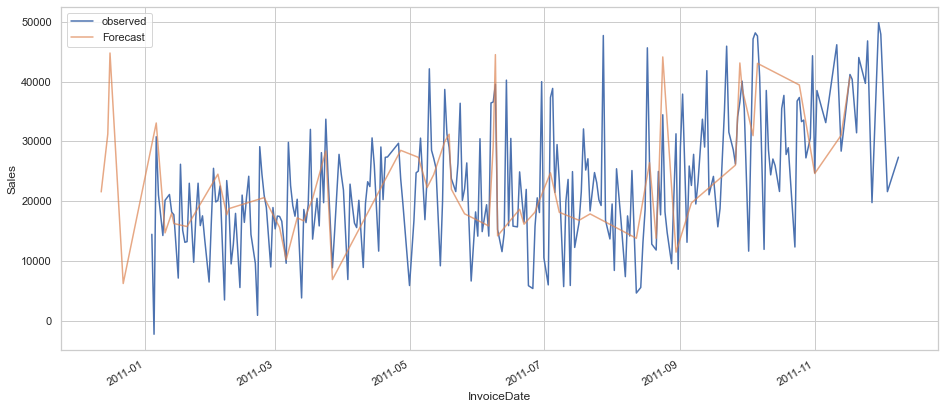

In [86]:
df_temp=pd.DataFrame({
        'y':y_test,
        'y_hat':y_pred
}
)
preds = df_temp['y_hat']
ax = y['2011':].plot(label='observed')
preds.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

De manera visual no se nota tanto el cambio, pero mirando de manera mas detenida si se ve cierta mejoría en algunos puntos.

### Suavizado por Medias Moviles

In [87]:
df_UK['sma_1_semana']=df_UK['Sales'].rolling(window=7).mean()

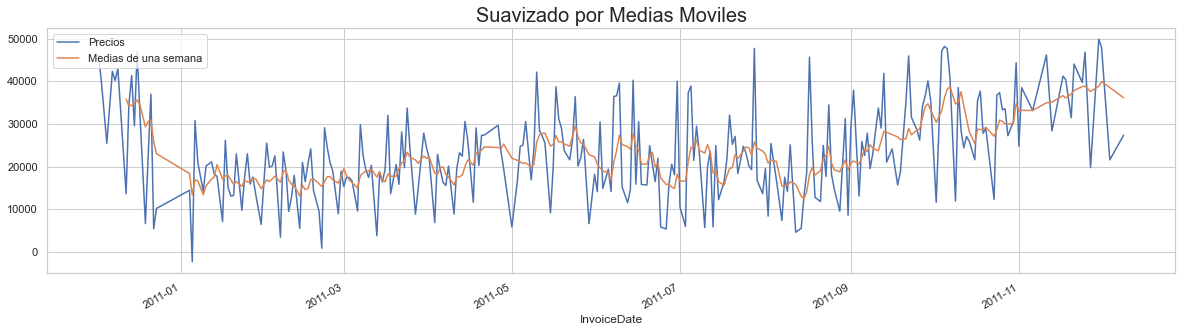

In [88]:
df_UK.Sales.plot(figsize=(18,5))
df_UK.sma_1_semana.plot()
#df_UK.sma_1_mes.plot()
plt.legend(fontsize=25)
plt.title('Suavizado por Medias Moviles', size=20)
plt.legend(labels=['Precios', 'Medias de una semana', 'Medias de un mes'], loc=2)
 #loc habla de la localizcion contando desde la esquina superior derecha hacia la izquierda
plt.show()

In [89]:
from statsmodels.tsa.arima_model import ARMA

In [90]:
df_UK['sma_1_mes']=df_UK['Sales'].rolling(window=30).mean()

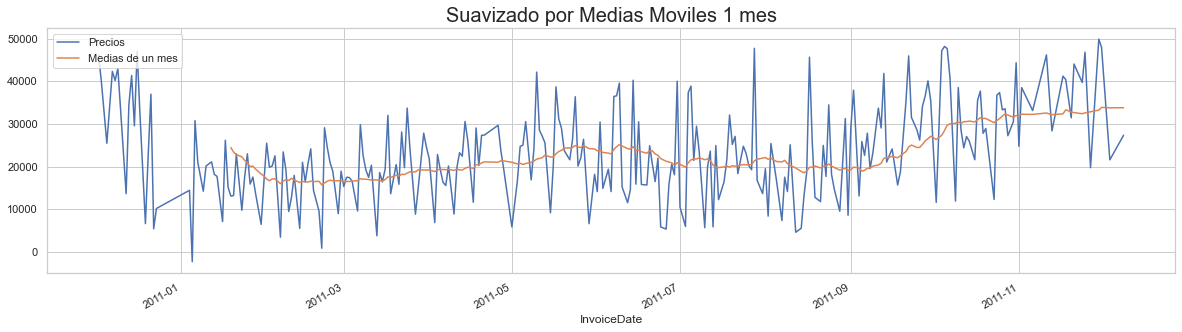

In [91]:
df_UK.Sales.plot(figsize=(18,5))
df_UK.sma_1_mes.plot()
plt.legend(fontsize=25)
plt.title('Suavizado por Medias Moviles 1 mes', size=20)
plt.legend(labels=['Precios', 'Medias de un mes', 'Medias de un mes'], loc=2)
#loc habla de la localizcion contando desde la esquina superior derecha hacia la izquierda
plt.show()

A simple vista, este modelo puede parecer el peor, pero en realidad estos modelos Suavizados nos sirven para predecir de buena manera, mas que para ajustarse a la curva. Ademas, podemos notar que el suavizado por mes, es mucho mas invariante que el de semana, por lo que para predicciones a largo plazo se recomendaria un suavizado a mayor intervalos de tiempo, pero para uno mas sujeto a cambios, se usaría uno con menor intervalos de tiempo.

### Conclusiones:

Los modelos realizados no predicen de buena manera las ventas. Esto puede ser debido a diversas cosas realizadas durante nuestro analisis de datos y descriptivo. Entre los cuales, los que pensamos que pudieron haber afectado a gran escala son:
* Solo tomamos un país, para representar los datos de todos.
* Se realizo limpieza de muchos datos (outliers), lo cual quizas pudo afectar la representatividad de los mismos.
* Trabajamos las fechas quitandoles las horas, es decir por dias. Esto tambien pudo haber afectado el trabajo.
Cabe destacar que los tres primeros modelos no predicen de buena manera las ventas, porque buscan ajustarse a la curva, en cambio el suavizado busca predecir.

Ademas, con datos como estos se puede realizar un trabajo mas detallado, lo cual no nos fue posible en virtud del tiempo. Se podria realizar un analisis para cada país, productos, entre otras cosas.
